In [16]:
import numpy as np
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt
import sys

In [40]:

class RGraph():
    def __init__(self, num_location, num_home, starting_location):
        self.num_location = num_location
        self.num_home = num_home
        self.starting_location = starting_location
        self.edge_matrix = np.zeros((self.num_location, self.num_location))
        self.visited = {}
        self.locations = [starting_location]
        self.homes = []

    def check_if_connected(self):
        return all([value for value in self.visited.values()])

    def dfs(self, i):
        self.visited[i] = True
        for j in range(self.num_location):
            if self.edge_matrix[i][j] != 0 and not self.visited[j]:
                self.dfs(j)


    def generate_random_edge(self):
        return np.around(np.random.uniform(0,10), 5)
    def random_input_generator(self):

        p1 = 1
        p2 = 1
        p3 = 0
        for i in range(self.num_location-1):
            self.locations.append("location{}".format(i+1))

        for i in range(self.num_location):
            for j in range(self.num_location):
                if j > i or i == j :
                    continue
                if np.random.uniform(0,1) < p1:
                    if np.random.uniform(0,1) < p2:
                        rand_num = self.generate_random_edge()
                        self.edge_matrix[i][j], self.edge_matrix[j][i] = rand_num, rand_num
                        if np.random.exponential(0.5) < p3:
                            self.edge_matrix[i][j], self.edge_matrix[j][i] = 0, 0
                            indexi = round(np.random.uniform(0,self.num_location))
                            indexj = round(np.random.uniform(0,self.num_location))
                            self.edge_matrix[indexi-1][indexj-1], self.edge_matrix[indexj-1][indexi-1] = 0, 0

        # check if the graph is connected
        self.visited = dict([(i, False) for i in range(self.num_location)])
        self.dfs(0)
        if self.check_if_connected():
            print('connected')
        else:
            print('not connected')

        self.homes = self.locations.copy()[1:self.num_home+1]
        np.random.shuffle(self.homes)

        self.generate_input()

    def generate_input(self):
        print(self.num_location)
        print(self.num_home)

        [print(v, end =  ' ') for v in self.locations]
        print()
        [print(h, end =  ' ') for h in self.homes]
        print()
        print(self.starting_location)
        for i in range(self.num_location):
            for j in range(self.num_location):
                if self.edge_matrix[i][j] == 0:
                    print("x", end = ' ')
                else:
                    print(str(self.edge_matrix[i][j]), end = ' ')
            print()
            
    def generate_output(self):
        print("Soda")
        print(1)
        print("Soda", end = ' ')
        for h in self.homes:
            print(h, end = ' ')
        

In [41]:
g = RGraph(4, 4, "Soda")
g.random_input_generator()

connected
4
4
Soda location1 location2 location3 
location1 location3 location2 
Soda
x 1.66234 0.4338 2.31065 
1.66234 x 8.10574 0.58218 
0.4338 8.10574 x 9.79819 
2.31065 0.58218 9.79819 x 


In [42]:
g.generate_output()

Soda
1
Soda location1 location3 location2 

In [51]:
class MST():
    def __init__(self, list_of_locations, adjacency_matrix, starting_car_location):
        self.V = list_of_locations
        self.adjacency_matrix = adjacency_matrix
        self.starting_car_location = starting_car_location
        self.inMST = [False] * len(self.V)
        self.inMST[list_of_locations.index(starting_car_location)] = True
        self.mst = [[0] * len(self.V)] * len(self.V)

    def isValidEdge(self, u, v):
        if u == v:
            return False
        if self.inMST[u] == False and self.inMST[v] == False:
            return False
        elif self.inMST[u] == True and self.inMST[v] == True:
            return False
        return True

    def constructMst(self):
        edge_count = 0
        while edge_count < len(self.V) - 1:
            minVal = sys.maxsize
            a = -1
            b = -1
            for i in range(len(self.V)):
                for j in range(len(self.V)):
                    if self.adjacency_matrix[i][j] < minVal and self.adjacency_matrix[i][j] != 0:
                        if self.isValidEdge(i, j):
                            minVal = self.adjacency_matrix[i][j]
                            print(minVal)
                            a = i
                            b = j
            if a != -1 and b != -1:
                self.inMST[a] = self.inMST[b] = True
                self.mst[a][b] = minVal
                print(self.mst)
                print(a)
                print(b)
            edge_count += 1
        return self.mst

In [52]:
mst = MST(g.locations, g.edge_matrix, g.starting_location)
print(mst.constructMst())


1.66234
0.4338
[[0, 0, 0.4338, 0], [0, 0, 0.4338, 0], [0, 0, 0.4338, 0], [0, 0, 0.4338, 0]]
0
2
1.66234
[[0, 1.66234, 0.4338, 0], [0, 1.66234, 0.4338, 0], [0, 1.66234, 0.4338, 0], [0, 1.66234, 0.4338, 0]]
0
1
2.31065
0.58218
[[0, 1.66234, 0.4338, 0.58218], [0, 1.66234, 0.4338, 0.58218], [0, 1.66234, 0.4338, 0.58218], [0, 1.66234, 0.4338, 0.58218]]
1
3
[[0, 1.66234, 0.4338, 0.58218], [0, 1.66234, 0.4338, 0.58218], [0, 1.66234, 0.4338, 0.58218], [0, 1.66234, 0.4338, 0.58218]]


{0: 'Soda', 1: 'location1', 2: 'location2', 3: 'location3', 4: 'location4', 5: 'location5', 6: 'location6', 7: 'location7', 8: 'location8', 9: 'location9', 10: 'location10', 11: 'location11', 12: 'location12', 13: 'location13', 14: 'location14', 15: 'location15', 16: 'location16', 17: 'location17', 18: 'location18', 19: 'location19', 20: 'location20', 21: 'location21', 22: 'location22', 23: 'location23', 24: 'location24', 25: 'location25', 26: 'location26', 27: 'location27', 28: 'location28', 29: 'location29', 30: 'location30', 31: 'location31', 32: 'location32', 33: 'location33', 34: 'location34', 35: 'location35', 36: 'location36', 37: 'location37', 38: 'location38', 39: 'location39', 40: 'location40', 41: 'location41', 42: 'location42', 43: 'location43', 44: 'location44', 45: 'location45', 46: 'location46', 47: 'location47', 48: 'location48', 49: 'location49', 50: 'location50', 51: 'location51', 52: 'location52', 53: 'location53', 54: 'location54', 55: 'location55', 56: 'location56'

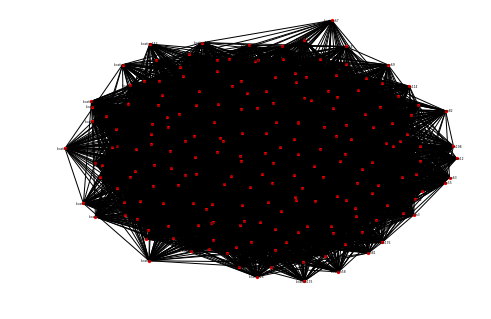

[[0.00000000e+00 7.01206598e+08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.01206598e+08 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.70239319e+08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.59249115e+08
  6.50514175e+08 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 5.59249115e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.50514175e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.70239319e+08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [145]:
def show_graph(adjacency_matrix, locations):
    labeldict = {i:label for i, label in enumerate(locations)}
    print(labeldict)
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=5, labels=labeldict, with_labels = True, font_size=3)
    plt.show()

show_graph(g.edge_matrix, g.locations)
print(g.edge_matrix)